# Figures for "An adaptive algorithm for unsupervised learning"




In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
seed = 42
np.random.seed(seed)

In [3]:
# for figures
import matplotlib.pyplot as plt

fontsize = 12
FORMATS = ['.pdf', '.eps', '.png', '.tiff']
FORMATS = ['.pdf', '.png']
dpi_export = 600

fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
#fig_width_pt = 1024 #221     # Get this from LaTeX using \showthe\columnwidth / x264 asks for a multiple of 2
ppi = 72.27 # (constant) definition of the ppi = points per inch
inches_per_pt = 1.0/ppi  # Convert pt to inches
#inches_per_cm = 1./2.54
fig_width = fig_width_pt*inches_per_pt  # width in inches
grid_fig_width = 2*fig_width
phi = (np.sqrt(5) + 1. ) /2
#legend.fontsize = 8
#fig_width = 9
fig_height = fig_width/phi
figsize = (fig_width, fig_height)


def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

import matplotlib
pylab_defaults = { 
    'font.size': 10,
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'text.usetex': False,
#    'font.family' : 'sans-serif',
#    'font.sans-serif' : ['Helvetica'],
    }
    
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update(pylab_defaults)
#matplotlib.rcParams.update({'text.usetex': True})

import matplotlib.cm as cm


from IPython.display import Image

DEBUG = True
DEBUG = False
hl, hs = 10*'🐶', 10*' '

In [4]:
tag = 'NIPS'

In [5]:
from shl_scripts.shl_experiments import SHL
datapath = '../../SHL_master/database'
shl = SHL(datapath=datapath)
data = shl.get_data(matname=tag + '_test')

In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  -1.3425387896193824e-05  +/-  0.005884598016072352
average energy of data =  0.18808326809398868 +/- 0.07074991784868241


## figure 1:  Role of homeostasis in learning sparse representations

#### TODO : cross-validate with 10 different learnings

In [7]:
fname = 'figure_map'
N_cv = 10
one_cv = 0 # picking one to display intermediate results

In [8]:
!ls -l {shl.data_cache}/{tag}*
!rm {shl.data_cache}/{tag}*lock*

-rw-r--r--  1 lolo  staff       1025 May 17 20:45 data_cache/NIPS.py
-rw-r--r--  1 lolo  staff    1954242 May 17 21:01 data_cache/NIPS_EMP_0_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 17 21:02 data_cache/NIPS_EMP_1_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 17 21:04 data_cache/NIPS_EMP_2_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 17 21:09 data_cache/NIPS_EMP_3_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 17 21:11 data_cache/NIPS_EMP_4_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 17 21:12 data_cache/NIPS_EMP_5_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 17 21:19 data_cache/NIPS_EMP_6_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 17 21:25 data_cache/NIPS_EMP_7_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 17 21:30 data_cache/NIPS_EMP_8_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 17 21:40 data_cache/NIPS_EMP_9_dico.pkl
-rw-r--r--  1 lolo  staff    1954519 May 17 15:11 data_cache/NIPS_EMP_dico.pkl
-rw-r--r--  1 lolo  staff    1954242 May 1

### learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          Non          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -5.491653899353215e-06 +/- 0.001211820798316661
average energy of filters =  1.0 +/- 3.215820483078219e-17


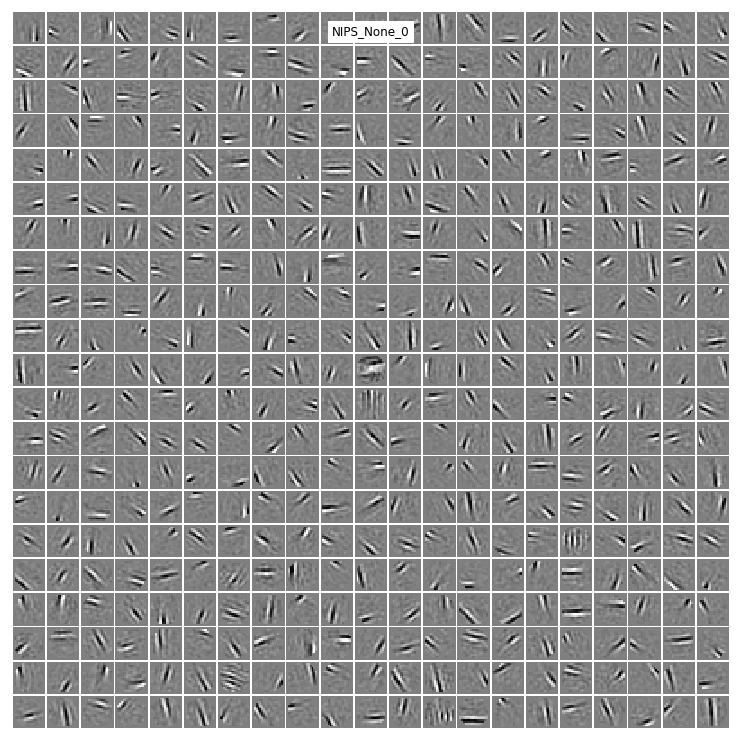

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          OLS          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -9.156420540112516e-06 +/- 0.0011914701391607025
average energy of filters =  1.0 +/- 3.700743415417188e-17


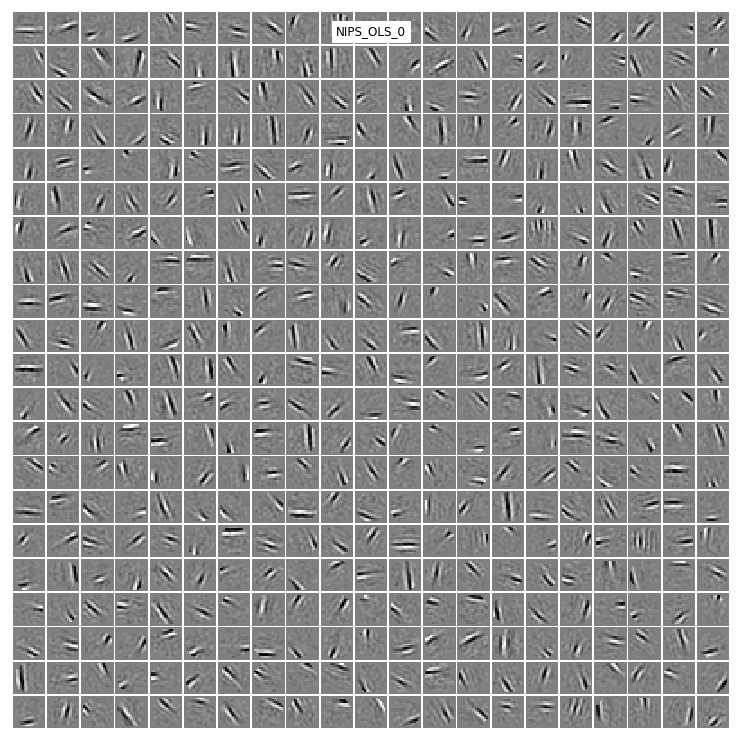

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          HEH          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  6.704322495299252e-07 +/- 0.0011925528907530208
average energy of filters =  1.0 +/- 3.127699043198379e-17


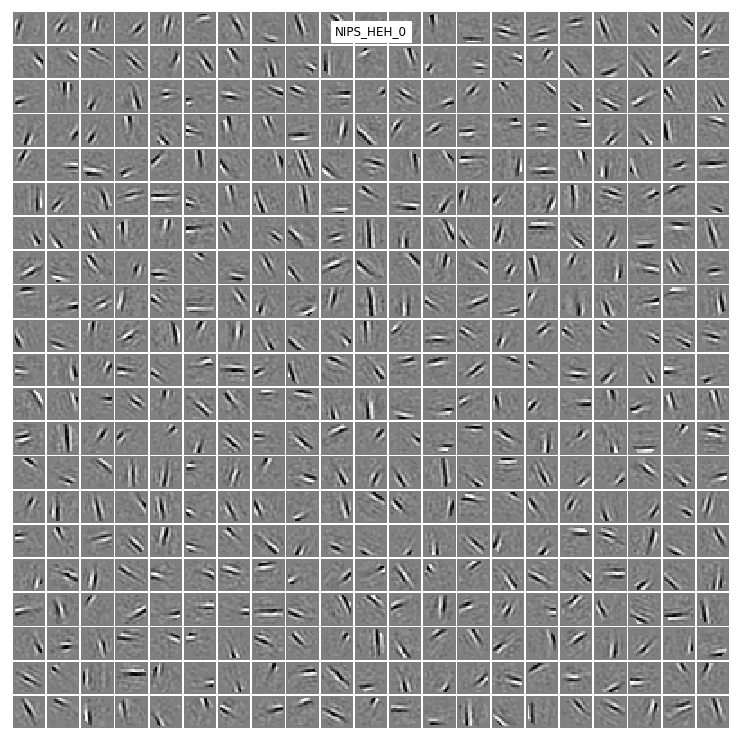

In [9]:
homeo_methods = ['None', 'OLS', 'HEH']

list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']
list_figures = []
dico = {}
for i_cv in range(N_cv):
    dico[i_cv] = {}
    for homeo_method in homeo_methods:
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv)
        dico[i_cv][homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_' + str(i_cv))

list_figures = ['show_dico']
for i_cv in [one_cv]:
    for homeo_method in homeo_methods:
        print(hl + hs + homeo_method[:3] + hs + hl)
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv)
        shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_' + str(i_cv))

        print('size of dictionary = (number of filters, size of imagelets) = ', dico[i_cv][homeo_method].dictionary.shape)
        print('average of filters = ',  dico[i_cv][homeo_method].dictionary.mean(axis=1).mean(), 
              '+/-',  dico[i_cv][homeo_method].dictionary.mean(axis=1).std())
        SE = np.sqrt(np.sum(dico[i_cv][homeo_method].dictionary**2, axis=1))
        print('average energy of filters = ', SE.mean(), '+/-', SE.std())
        plt.show()


### panel A: plotting some dictionaries



In [10]:
pname = '/tmp/panel_A' #pname = fname + '_A'

In [11]:
from shl_scripts import show_dico
if DEBUG: show_dico(shl, dico[one_cvi_cv][homeo_method], dim_graph=(2,5))

In [12]:
dim_graph = (2, 9)
colors = ['black', 'orange', 'blue']
homeo_methods

['None', 'OLS', 'HEH']

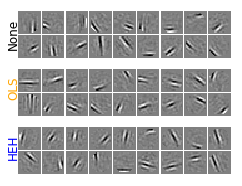

In [13]:
subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig, axs = plt.subplots(3, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, color, homeo_method in zip(axs.ravel(), colors, homeo_methods): 
    ax.axis(c=color, lw=2, axisbg='w')
    ax.set_facecolor('w')
    fig, ax = show_dico(shl, dico[one_cv][homeo_method], dim_graph=dim_graph, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'

for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)

In [14]:
if DEBUG: Image(pname +'.png')

In [15]:
if DEBUG: help(fig.subplots_adjust)

In [16]:
if DEBUG: help(plt.subplots)

In [17]:
if DEBUG: help(matplotlib.gridspec.GridSpec)

### panel B: quantitative comparison



In [18]:
pname = '/tmp/panel_B' #fname + '_B'

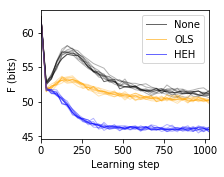

In [19]:
from shl_scripts import time_plot
variable = 'F'
alpha = .3
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
for i_cv in range(N_cv):
    for color, homeo_method in zip(colors, homeo_methods): 
        ax.axis(c='b', lw=2, axisbg='w')
        ax.set_facecolor('w')
        if i_cv==0:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, label=homeo_method, alpha=.6, fig=fig, ax=ax)
        else:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, alpha=alpha, fig=fig, ax=ax)        
        # ax.set_ylabel(homeo_method)
        #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'
ax.legend(loc='best')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [20]:
import tikzmagic

In [21]:
%load_ext tikzmagic

In [22]:
#DEBUG = True
if DEBUG: help(tikzmagic)

In [23]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

convert: FailedToExecuteCommand `'gs' -sstdout=%stderr -dQUIET -dSAFER -dBATCH -dNOPAUSE -dNOPROMPT -dMaxBitmap=500000000 -dAlignToPixels=0 -dGridFitTT=2 '-sDEVICE=pngalpha' -dTextAlphaBits=4 -dGraphicsAlphaBits=4 '-r600x600'  '-sOutputFile=/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-456208dG530Jn5z8k%d' '-f/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45620Zvs54tspLgjk' '-f/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45620vE6t378WRFyu'' (1) @ error/pdf.c/InvokePDFDelegate/291.
convert: no images defined `figure_map.jpg' @ error/convert.c/ConvertImageCommand/3275.
convert: FailedToExecuteCommand `'gs' -sstdout=%stderr -dQUIET -dSAFER -dBATCH -dNOPAUSE -dNOPROMPT -dMaxBitmap=500000000 -dAlignToPixels=0 -dGridFitTT=2 '-sDEVICE=pngalpha' -dTextAlphaBits=4 -dGraphicsAlphaBits=4 '-r600x600'  '-sOutputFile=/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45622CpNRNgSoMGRM%d' '-f/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45622RlyksRGkmwT7' 

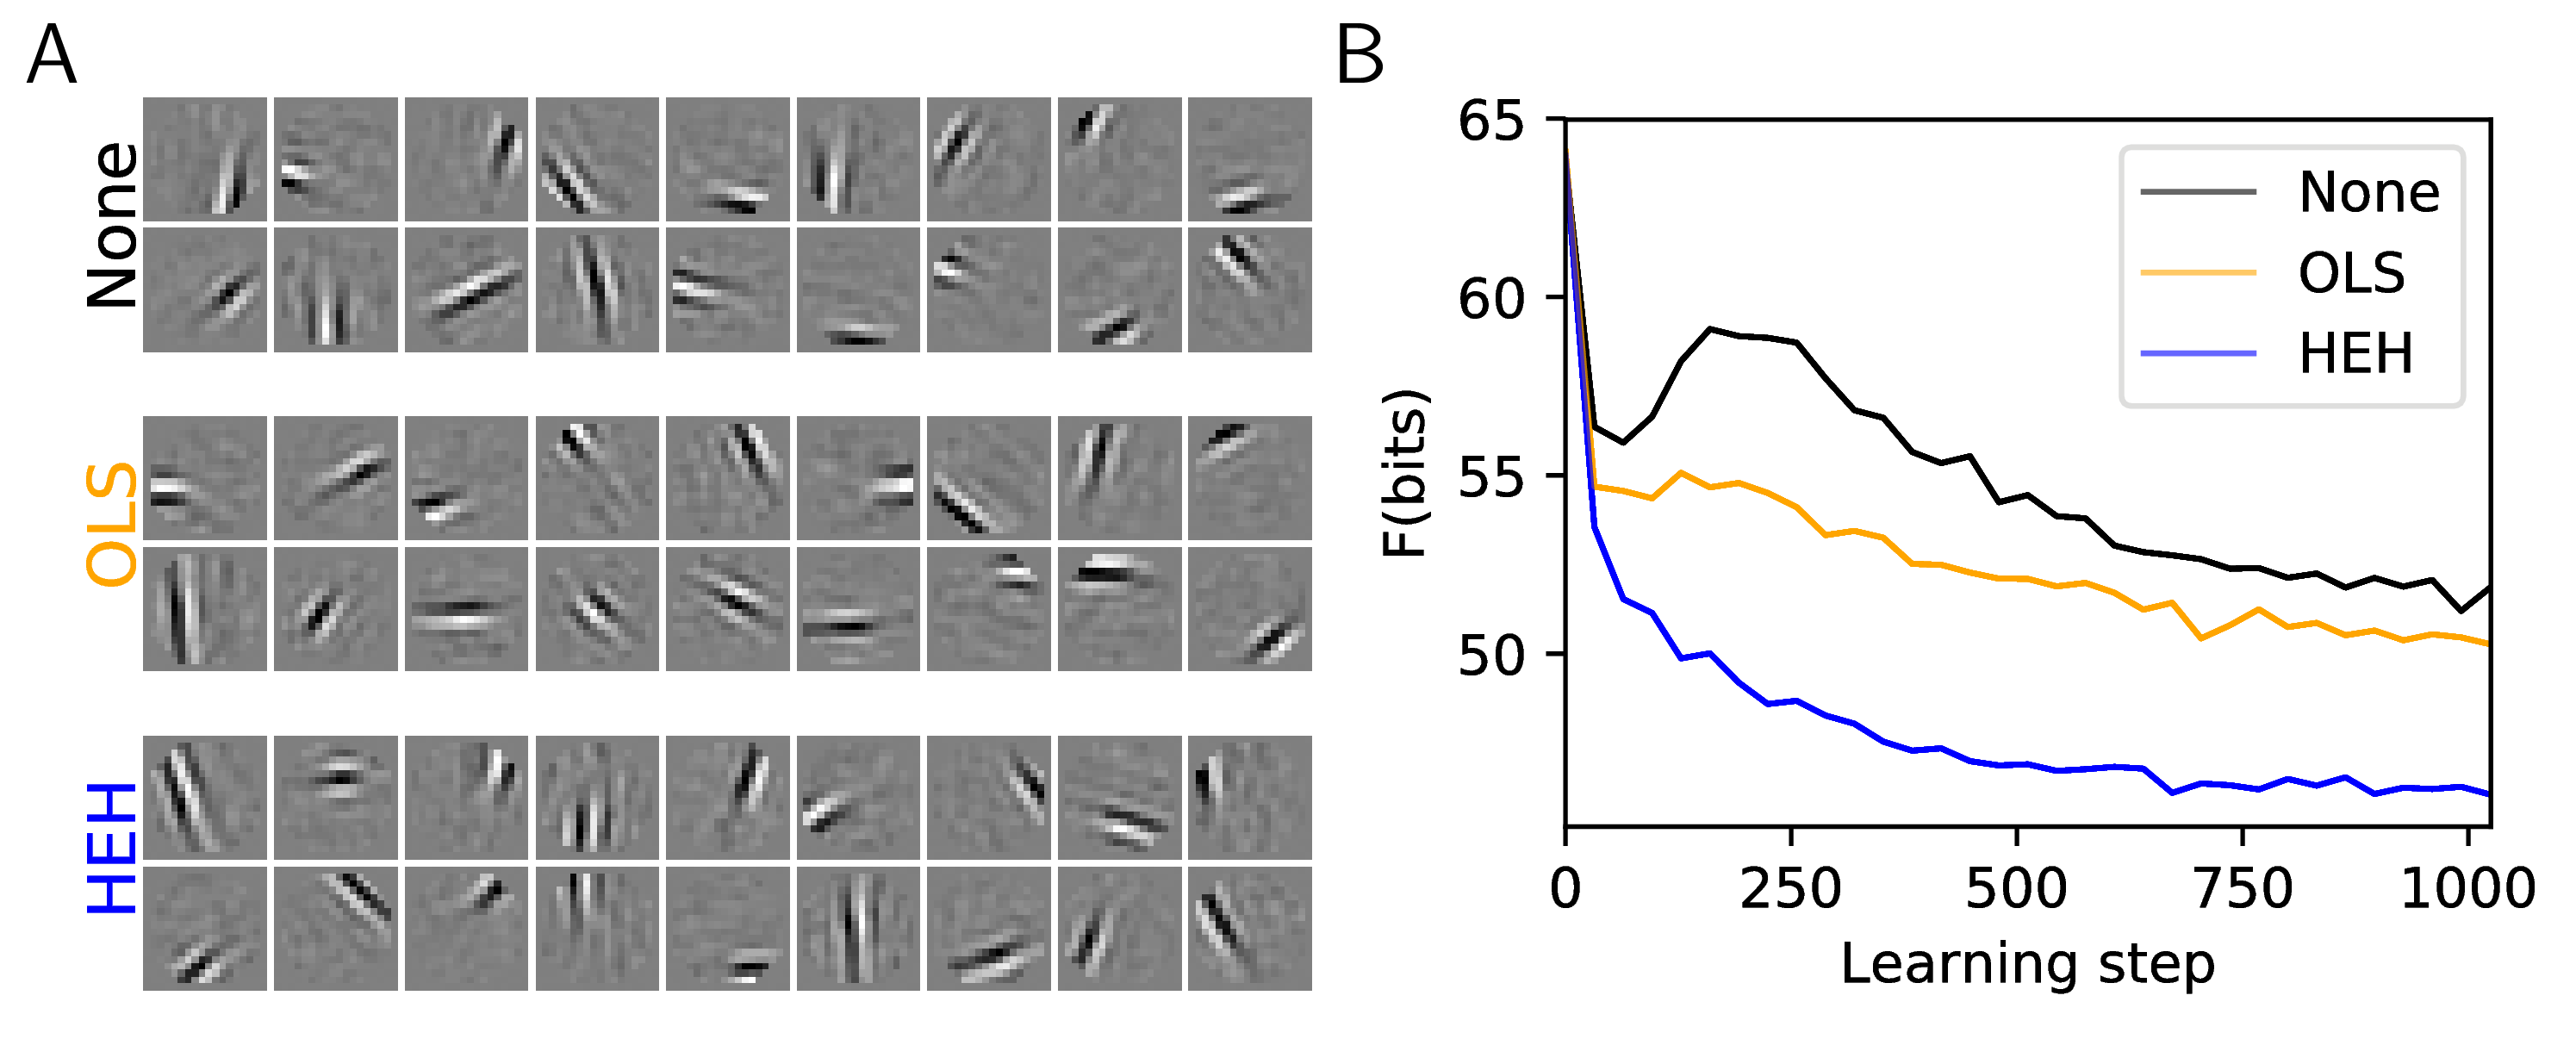

In [24]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## figure 2: Histogram Equalization Homeostasis


\centering{
\begin{tikzpicture}
%\draw [anchor=north west] (0, .8\linewidth) node {\includegraphics[width=\linewidth]{PDF_nohomeo}};
%\draw [anchor=north west] (0, .4\linewidth) node {\includegraphics[width=\linewidth]{z_score}};
%\draw [anchor=north west] (0, .0) node {\includegraphics[width=\linewidth]{PDF_homeo}};
\draw (.7\linewidth, 0) node [above right=0mm] {$\mathsf{A}$};
\draw (.3\linewidth, 0) node [above right=0mm] {$\mathsf{B}$};
\draw (-.1\linewidth, 0) node [above right=0mm] {$\mathsf{C}$};
\draw (.0\linewidth, .38\linewidth) node [above right=0mm] {$\mathsf{box}$};
\draw (.85\linewidth, .38\linewidth) node [above right=0mm] {$\mathsf{box}$};
\end{tikzpicture}}



In [25]:
fname = 'figure_HEH'

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          None          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


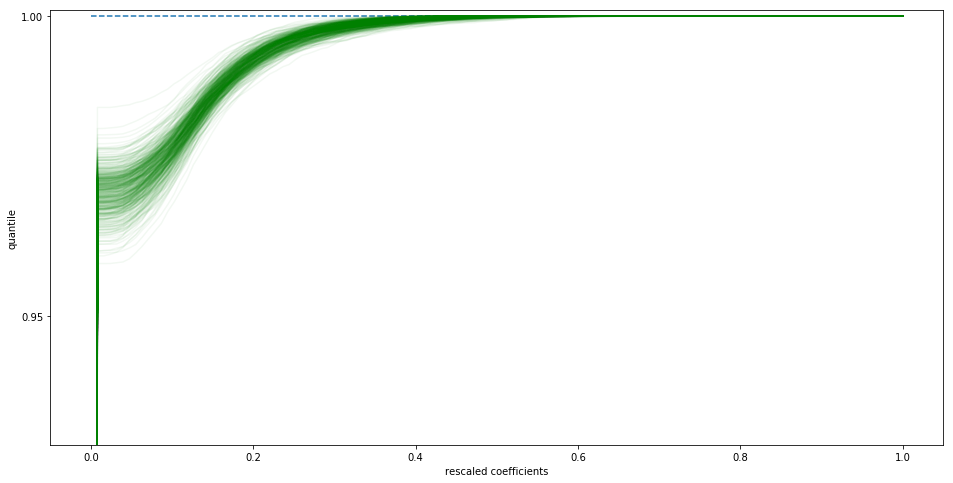

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          OLS          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


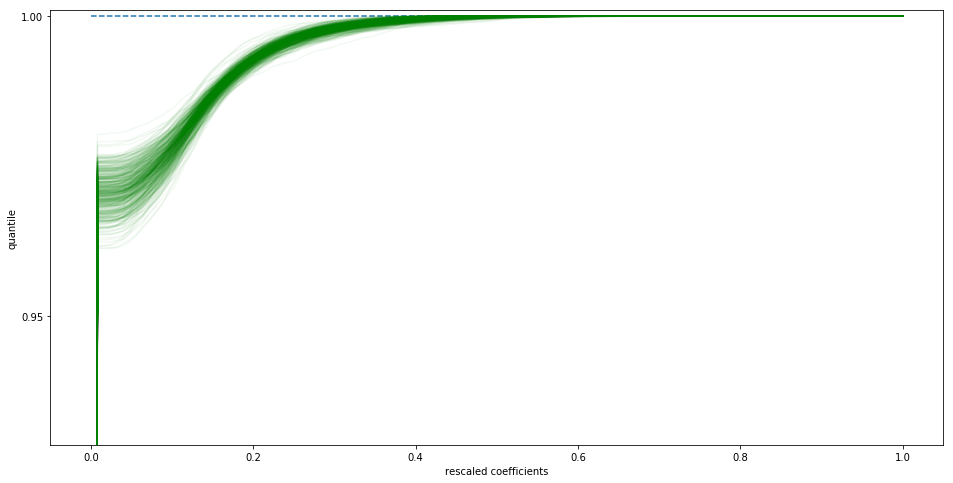

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          HEH          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


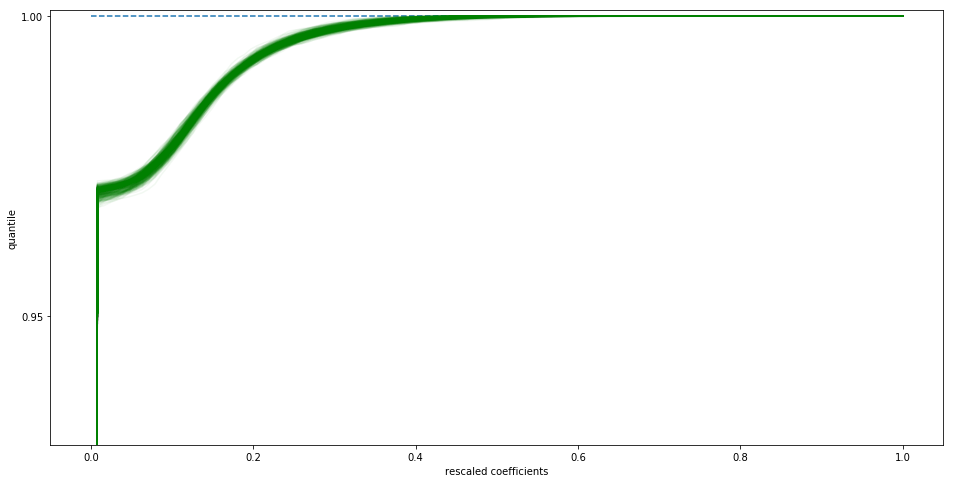

In [26]:
list_figures = ['show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(hl + hs + homeo_method + hs + hl)
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)
    plt.show()

In [27]:
dico[homeo_method].P_cum.shape

(441, 128)

### panel A: different P_cum



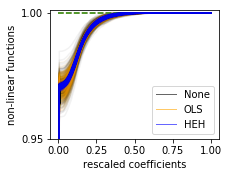

In [28]:
pname = '/tmp/panel_A' #pname = fname + '_A'

from shl_scripts import plot_P_cum
variable = 'F'
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
for color, homeo_method in zip(colors, homeo_methods): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    fig, ax = plot_P_cum(dico[homeo_method].P_cum, ymin=0.95, ymax=1.001, 
                         title=None, suptitle=None, ylabel='non-linear functions', 
                         verbose=False, n_yticks=21, alpha=.05, c=color, fig=fig, ax=ax)
    ax.plot([0], [0], lw=1, color=color, label=homeo_method, alpha=.6)
    # ax.set_ylabel(homeo_method)
    #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'
ax.legend(loc='lower right')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')

In [29]:
if DEBUG: help(fig.legend)

### panel B: comparing the effects of parameters



In [ ]:
pname = '/tmp/panel_B' #fname + '_B'


from shl_scripts.shl_experiments import SHL_set

homeo_methods = ['None', 'EMP', 'HAP', 'HEH', 'OLS']
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness', 'n_dictionary']
variables = ['eta', 'alpha_homeo', 'eta_homeo']
display_variables = ['F']
list_figures = []

n_jobs = 4
n_jobs = 8
n_jobs = 2

for tag in homeo_methods:
    default = dict(verbose=verbose, homeo_method=tag)
    experiments = SHL_set(default, tag=tag)
    experiments.run(variables=variables, n_jobs=n_jobs)
    
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(variables), 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, variable in zip(axs, variables):
#     for tag in homeo_methods:
#         experiments = SHL_set(dict(homeo_method=homeo_method, datapath=datapath), tag=tag + '_' + homeo_method)
#         experiments.scan(variable=variable, list_figures=list_figures, display='')

    fig, ax = None, None
    for tag in homeo_methods:
        experiments = SHL_set(dict(homeo_method=homeo_method, datapath=datapath), tag=tag + '_' + homeo_method)
        fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=ax, label=tag, display_variable=display_variable)

fig.legend(loc='lower right')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [30]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

convert: FailedToExecuteCommand `'gs' -sstdout=%stderr -dQUIET -dSAFER -dBATCH -dNOPAUSE -dNOPROMPT -dMaxBitmap=500000000 -dAlignToPixels=0 -dGridFitTT=2 '-sDEVICE=pngalpha' -dTextAlphaBits=4 -dGraphicsAlphaBits=4 '-r600x600'  '-sOutputFile=/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45628aSNDWLIf6s8I%d' '-f/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-456280B-3WK2CKrYH' '-f/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45628cV4jpn04knny'' (1) @ error/pdf.c/InvokePDFDelegate/291.
convert: no images defined `figure_HEH.jpg' @ error/convert.c/ConvertImageCommand/3275.
convert: FailedToExecuteCommand `'gs' -sstdout=%stderr -dQUIET -dSAFER -dBATCH -dNOPAUSE -dNOPROMPT -dMaxBitmap=500000000 -dAlignToPixels=0 -dGridFitTT=2 '-sDEVICE=pngalpha' -dTextAlphaBits=4 -dGraphicsAlphaBits=4 '-r600x600'  '-sOutputFile=/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45630e1-uhFDVHiKB%d' '-f/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45630a0Y6BKGh4iwV' 

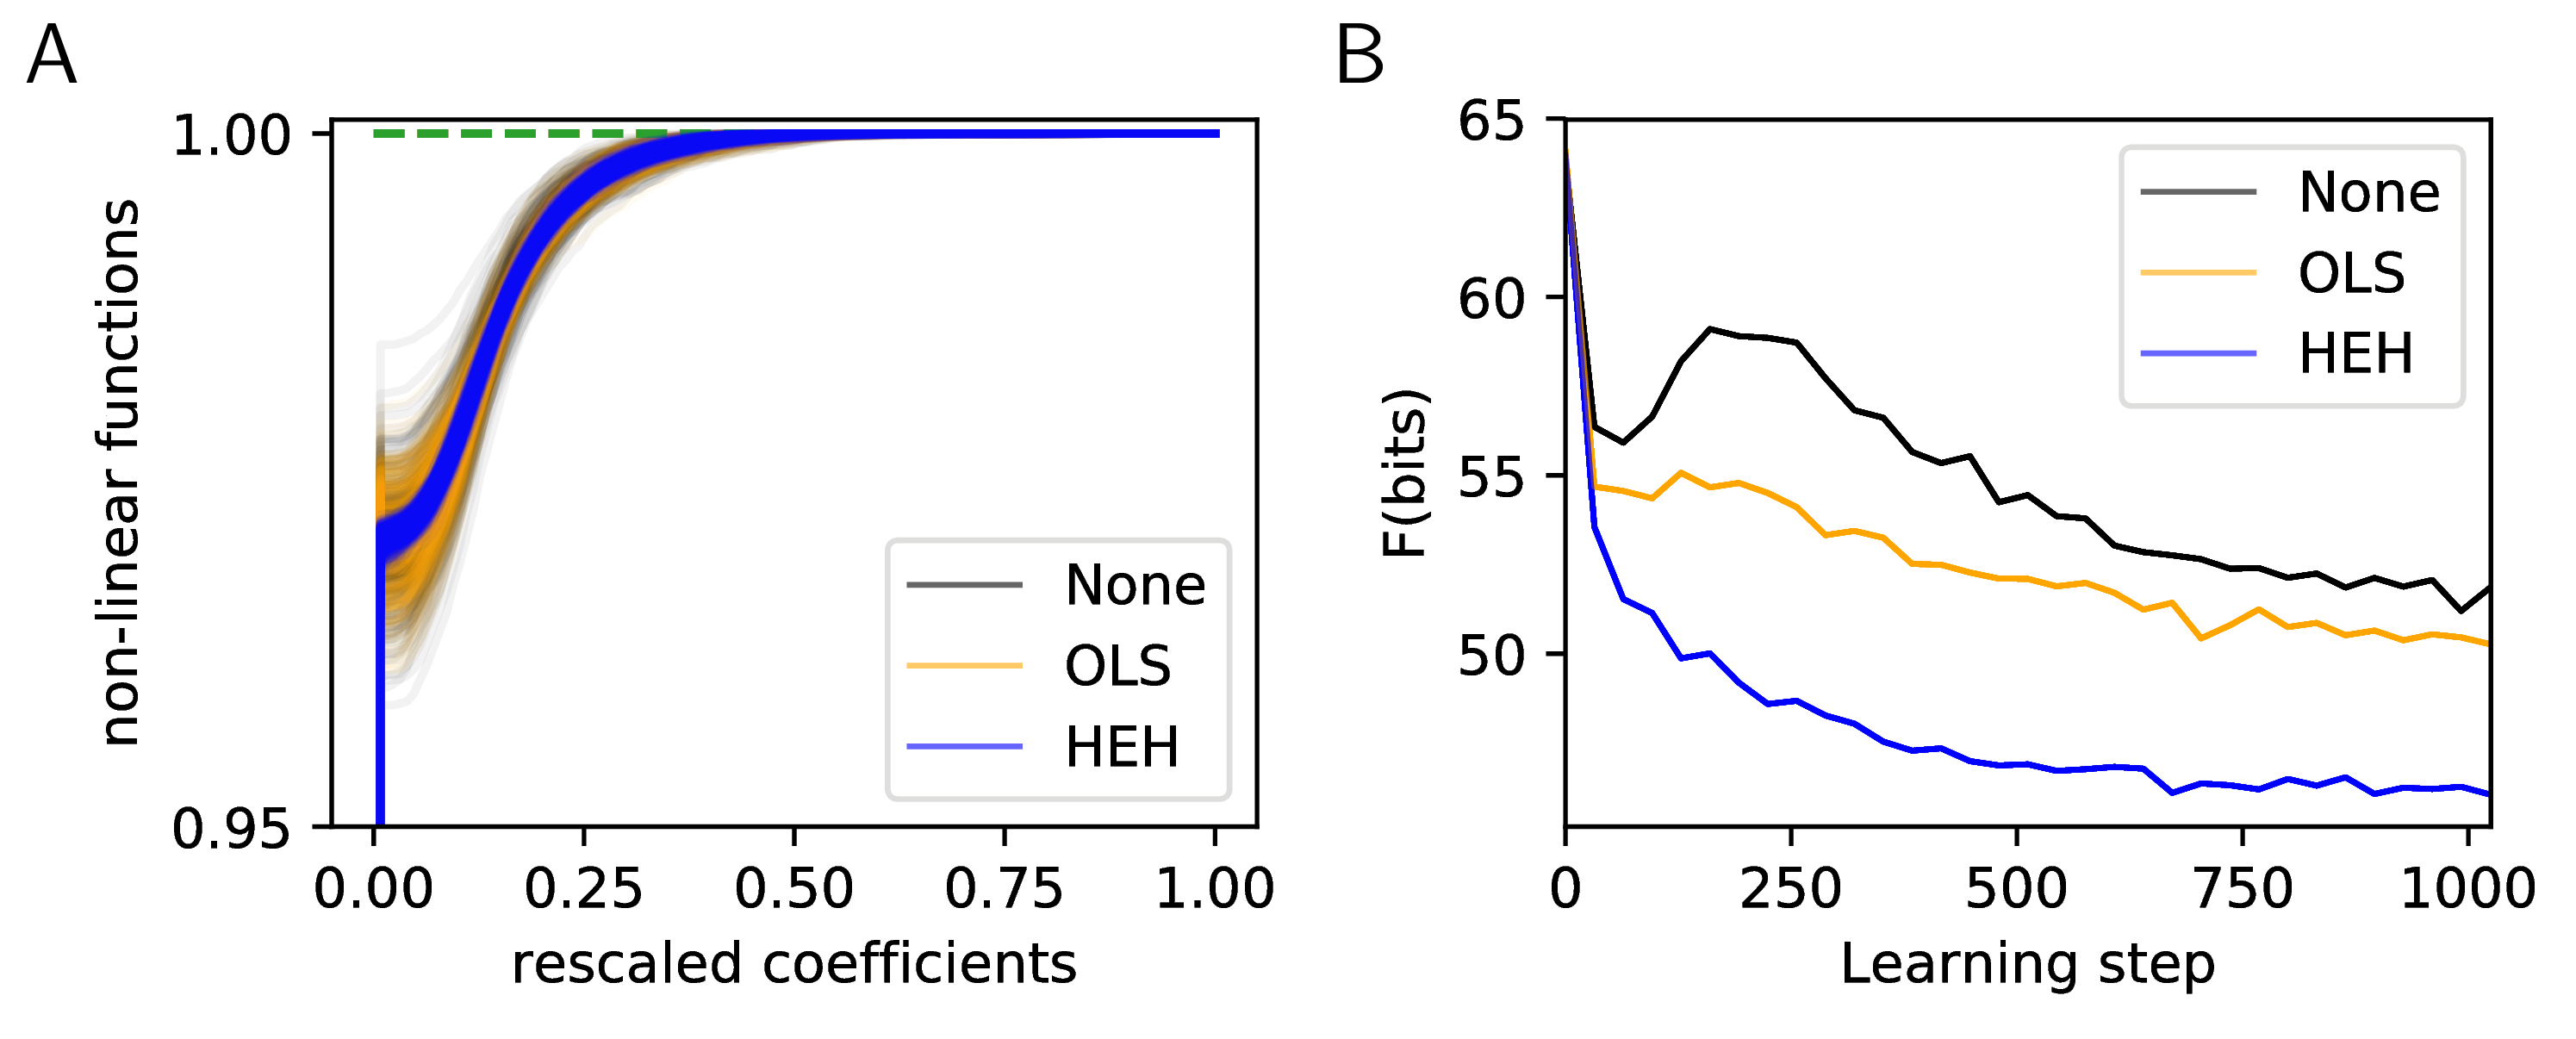

In [31]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## figure 3:  


\centering{
\begin{tikzpicture}
%\draw [anchor=north west] (0, .39\linewidth) node {\includegraphics[width=.47\linewidth]{dico_MP}};
%\draw [anchor=north west] (.5\linewidth, .39\linewidth) node {\includegraphics[width=.47\linewidth]{dico_SN}};
%\draw [anchor=north west] (.25\linewidth, -.1\linewidth) node {\includegraphics[width=.47\linewidth]{dico_MEUL}};
%\draw [anchor=north west] (.1\linewidth, -.6\linewidth) node {\includegraphics[width=.8\linewidth]{Comparison_reconstruction}};
\draw (0, .39\linewidth) node [above right=0mm] {$\mathsf{A}$};
\draw (.5\linewidth, .39\linewidth) node [above right=0mm] {$\mathsf{B}$};
%\draw (.2\linewidth, -.16\linewidth) node [above right=0mm] {$\mathsf{C}$};
%\draw (.05\linewidth, -.67\linewidth) node [above right=0mm] {$\mathsf{D}$};
\draw (.0\linewidth, .0\linewidth) node [above right=0mm] {$\mathsf{box}$};
\draw (.85\linewidth, .0\linewidth) node [above right=0mm] {$\mathsf{box}$};
\end{tikzpicture}}

### learning




In [32]:
fname = 'figure_HAP'

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          EMP          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


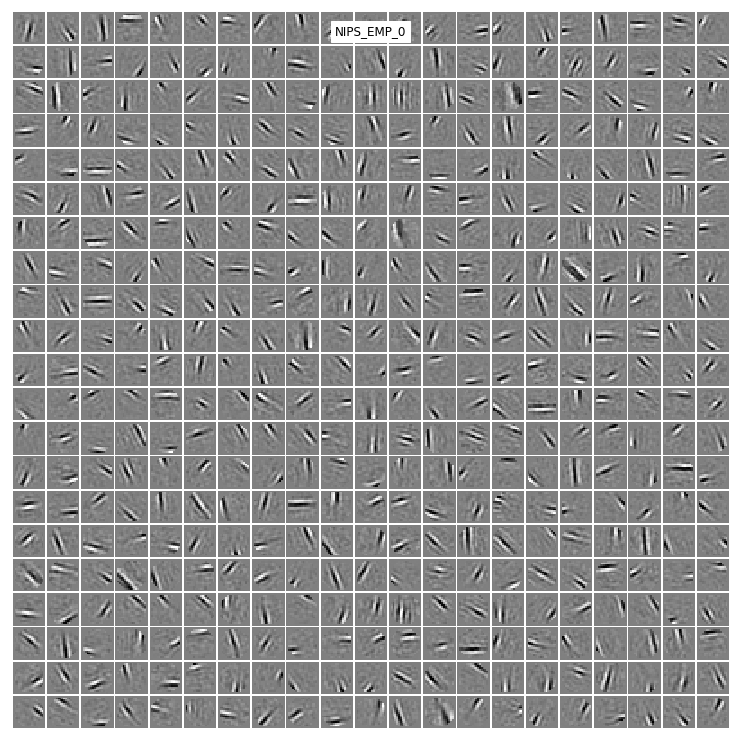

size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -4.0546067130953466e-05 +/- 0.0012428375363906384
average energy of filters =  1.0 +/- 4.608904732507739e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          HAP          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


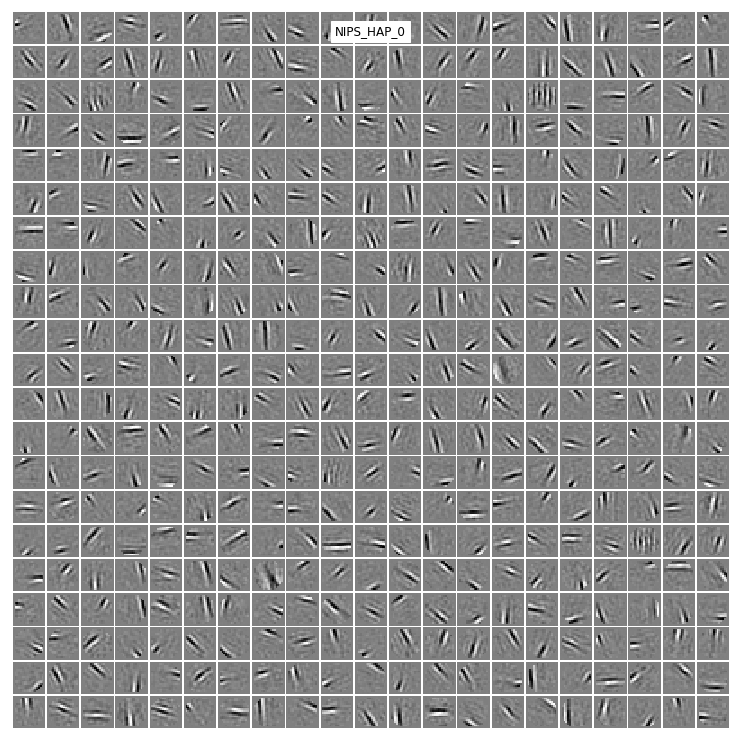

size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -2.4262304518747945e-05 +/- 0.0012639114688126542
average energy of filters =  1.0 +/- 4.816482439944845e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          HEH          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


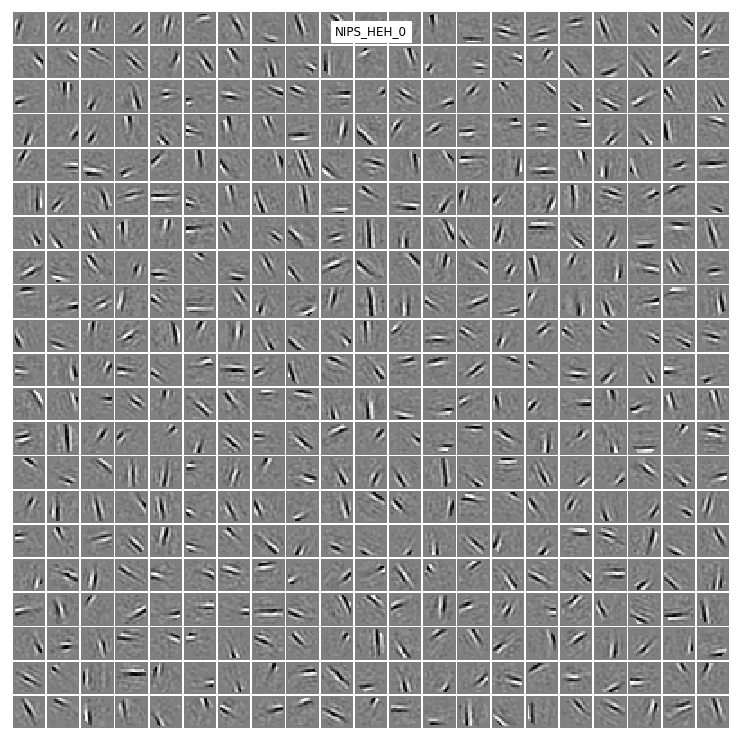

size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  6.704322495299252e-07 +/- 0.0011925528907530208
average energy of filters =  1.0 +/- 3.127699043198379e-17


In [35]:
colors = ['red', 'green', 'blue']
homeo_methods = ['EMP', 'HAP', 'HEH']
list_figures = []
dico = {}
for i_cv in range(N_cv):
    dico[i_cv] = {}
    for homeo_method in homeo_methods:
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv)
        dico[i_cv][homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_' + str(i_cv))

list_figures = ['show_dico']
for i_cv in [one_cv]:
    for homeo_method in homeo_methods:
        print(hl + hs + homeo_method + hs + hl)
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv)
        shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_' + str(i_cv))
        plt.show()
        print('size of dictionary = (number of filters, size of imagelets) = ', dico[i_cv][homeo_method].dictionary.shape)
        print('average of filters = ',  dico[i_cv][homeo_method].dictionary.mean(axis=1).mean(), 
              '+/-',  dico[i_cv][homeo_method].dictionary.mean(axis=1).std())
        SE = np.sqrt(np.sum(dico[i_cv][homeo_method].dictionary**2, axis=1))
        print('average energy of filters = ', SE.mean(), '+/-', SE.std())

### panel A: plotting some dictionaries



In [36]:
pname = '/tmp/panel_A' #pname = fname + '_A'

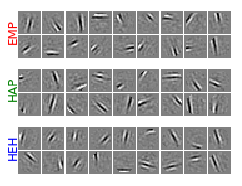

In [37]:

subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig, axs = plt.subplots(3, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, color, homeo_method in zip(axs.ravel(), colors, homeo_methods): 
    ax.axis(c=color, lw=2, axisbg='w')
    ax.set_facecolor('w')
    from shl_scripts import show_dico
    fig, ax = show_dico(shl, dico[one_cv][homeo_method], dim_graph=dim_graph, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'

for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)

### panel B: quantitative comparison



In [38]:
pname = '/tmp/panel_B' #fname + '_B'

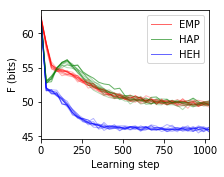

In [39]:
from shl_scripts import time_plot
variable = 'F'
alpha = .3
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
for i_cv in range(N_cv):
    for color, homeo_method in zip(colors, homeo_methods): 
        ax.axis(c='b', lw=2, axisbg='w')
        ax.set_facecolor('w')
        if i_cv==0:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, label=homeo_method, alpha=.6, fig=fig, ax=ax)
        else:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, alpha=alpha, fig=fig, ax=ax)        
ax.legend(loc='best')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')    

In [40]:
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [41]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

convert: FailedToExecuteCommand `'gs' -sstdout=%stderr -dQUIET -dSAFER -dBATCH -dNOPAUSE -dNOPROMPT -dMaxBitmap=500000000 -dAlignToPixels=0 -dGridFitTT=2 '-sDEVICE=pngalpha' -dTextAlphaBits=4 -dGraphicsAlphaBits=4 '-r600x600'  '-sOutputFile=/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45636Ko5UCqsmj6Kz%d' '-f/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45636m0Go60DUU3DJ' '-f/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45636K0lro4ftx0xn'' (1) @ error/pdf.c/InvokePDFDelegate/291.
convert: no images defined `figure_HAP.jpg' @ error/convert.c/ConvertImageCommand/3275.
convert: FailedToExecuteCommand `'gs' -sstdout=%stderr -dQUIET -dSAFER -dBATCH -dNOPAUSE -dNOPROMPT -dMaxBitmap=500000000 -dAlignToPixels=0 -dGridFitTT=2 '-sDEVICE=pngalpha' -dTextAlphaBits=4 -dGraphicsAlphaBits=4 '-r600x600'  '-sOutputFile=/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45638EjPcPlepldV5%d' '-f/var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/magick-45638d_nG2gI3q3kn' 

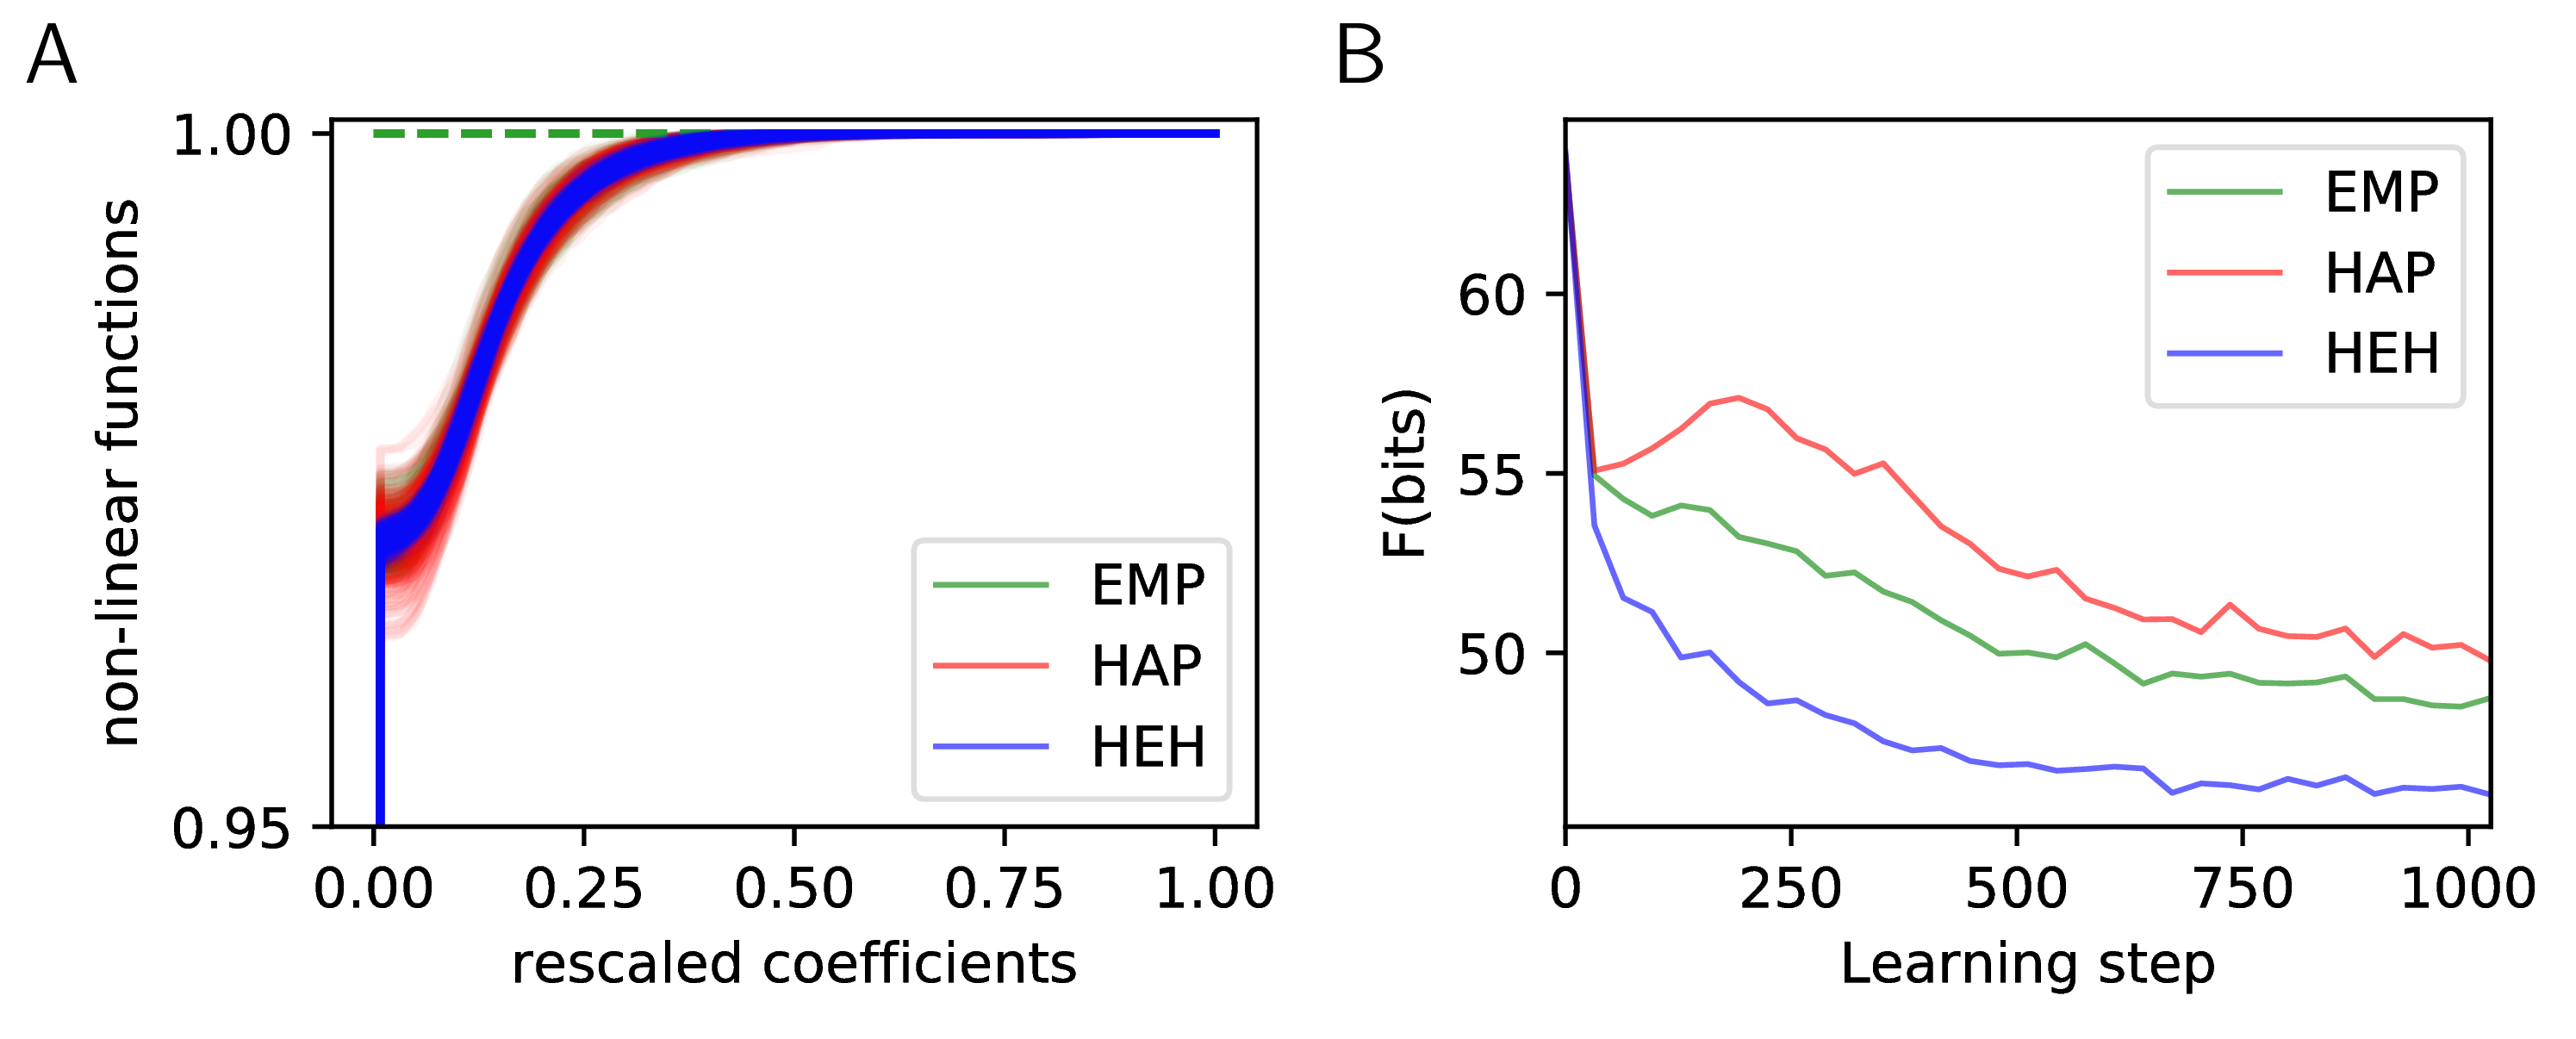

In [42]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

# Supplementary controls




## starting a learning

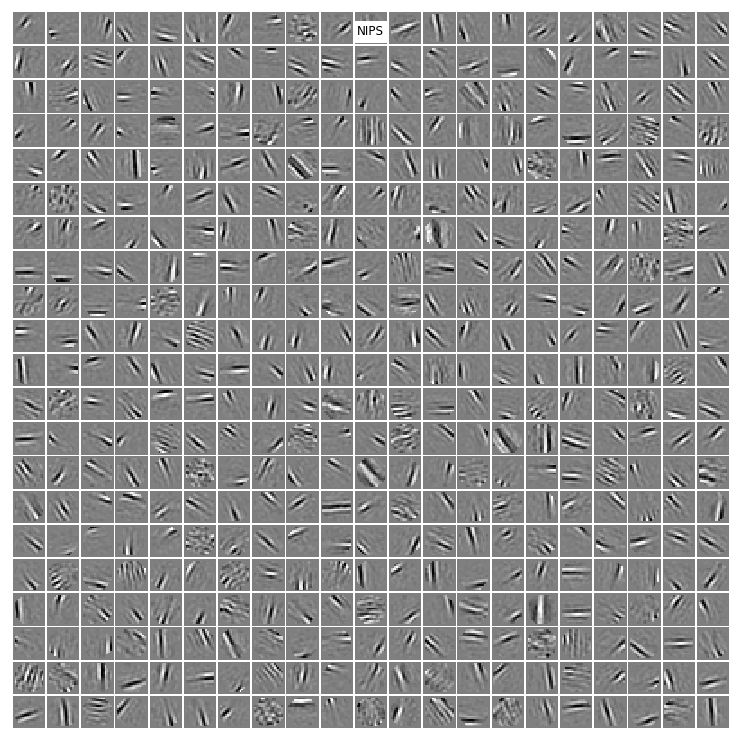

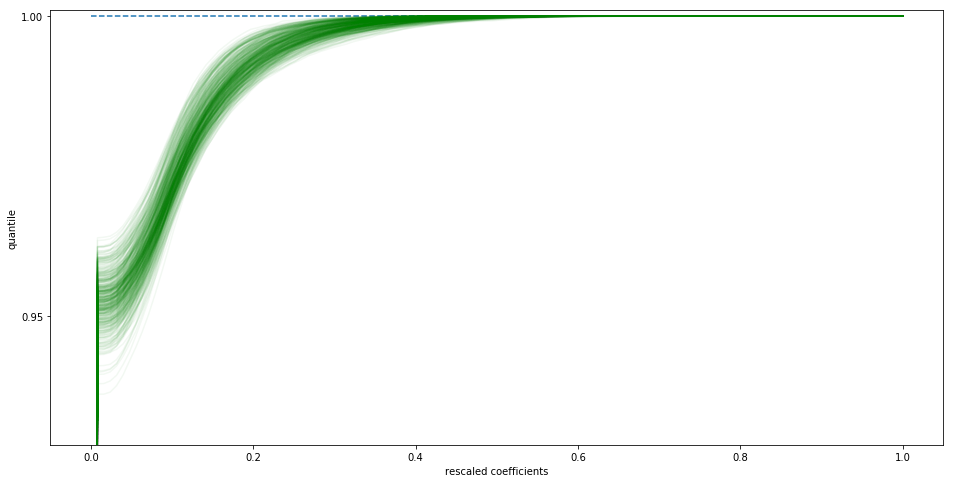

In [44]:
shl = SHL()
list_figures = ['show_dico', 'show_Pcum', 'time_plot_F']
dico = shl.learn_dico(data=data, list_figures=list_figures, matname=tag)

In [45]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  2.6334141722870843e-06 +/- 0.0013685647268896408
average energy of filters =  1.0 +/- 3.700743415417188e-17



## getting help

In [49]:
help(shl)

Help on SHL in module shl_scripts.shl_experiments object:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_width=18, N_patches=65536, datapath='../database/', name_database='kodakdb', do_mask=True, do_bandpass=True, over_patches=16, patch_ds=1, n_dictionary=441, learning_algorithm='mp', fit_tol=None, do_precision=False, l0_sparseness=21, one_over_F=True, n_iter=1025, eta=0.003, beta1=0.9, beta2=0.999, epsilon=1e-08, homeo_method='HAP', eta_homeo=0.02, alpha_homeo=0.08, C=4.0, nb_quant=128, P_cum=None, do_sym=False, seed=42, patch_norm=False, batch_size=1024, record_each=32, record_num_batches=1024, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, data_cache='data_cache')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  code(self, data, dico, coding

In [50]:
help(dico)

Help on SparseHebbianLearning in module shl_scripts.shl_learn object:

class SparseHebbianLearning(builtins.object)
 |  Sparse Hebbian learning
 |  
 |  Finds a dictionary (a set of atoms) that can best be used to represent data
 |  using a sparse code.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_dictionary : int,
 |      Number of dictionary elements to extract
 |  
 |  eta : float or dict
 |      Gives the learning parameter for the homeostatic gain.
 |  
 |  n_iter : int,
 |      total number of iterations to perform
 |  
 |  eta_homeo : float
 |      Gives the learning parameter for the homeostatic gain.
 |  
 |  alpha_homeo : float
 |      Gives the smoothing exponent  for the homeostatic gain
 |      If equal to 1 the homeostatic learning rule learns a linear relation to
 |      variance.
 |  
 |  dictionary : array of shape (n_dictionary, n_pixels),
 |      initial value of the dictionary for warm restart scenarios
 |      Use ``None`` for a new learning.
 |  
 |  fit_algorith


## loading a database

Loading patches, with or without mask:

In [ ]:
N_patches = 12
from shl_scripts.shl_tools import show_data

for i, (do_mask, label) in enumerate(zip([False, True], ['Without mask', 'With mask'])):
    data = SHL(DEBUG_DOWNSCALE=1, verbose=0, N_patches=N_patches, n_image=1, do_mask=do_mask).get_data()
    fig, axs = show_data(data)
    axs[0].set_ylabel(label)
    plt.show()

## Testing different algorithms



In [ ]:
fig, ax = None, None
for algorithm in ['lasso_lars', 'lasso_cd', 'lars', 'omp', 'mp']: # 'threshold', 
    opts = dict(homeo_method='None', learning_algorithm=algorithm, verbose=0)

    experiments = SHL_set(opts, tag=tag + ' - algorithm={}'.format(algorithm))
    experiments.scan(variable='eta', list_figures=list_figures, display='')
    fig, ax = experiments.scan(variable='eta', list_figures=[], display='final', fig=fig, ax=ax, label=algorithm, display_variable='F')   
ax.legend()

## Testing two different dictionary initalization strategies

White Noise Initialization + Learning

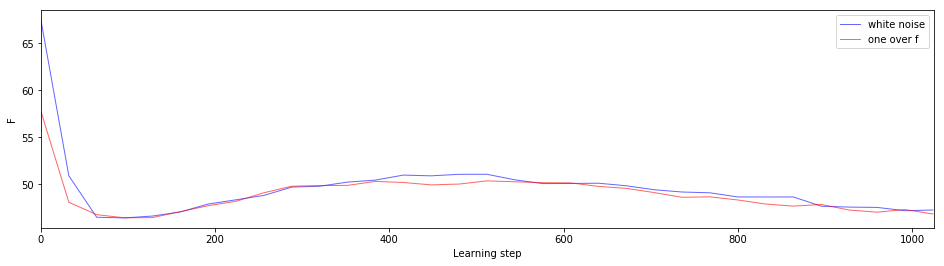

In [53]:
shl = SHL(one_over_F=False)
dico_w = shl.learn_dico(data=data, matname=tag + '_WHITE', list_figures=[])
shl = SHL(one_over_F=True)
dico_1oF = shl.learn_dico(data=data, matname=tag + '_OVF', list_figures=[])
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico_w, variable='F', fig=fig_error, ax=ax_error, color='blue', label='white noise')
fig_error, ax_error = shl.time_plot(dico_1oF, variable='F', fig=fig_error, ax=ax_error, color='red', label='one over f')
#ax_error.set_ylim((0, .65))
ax_error.legend(loc='best')

## Testing  two different learning rates strategies

We use by defaut the strategy of ADAM, see https://arxiv.org/pdf/1412.6980.pdf

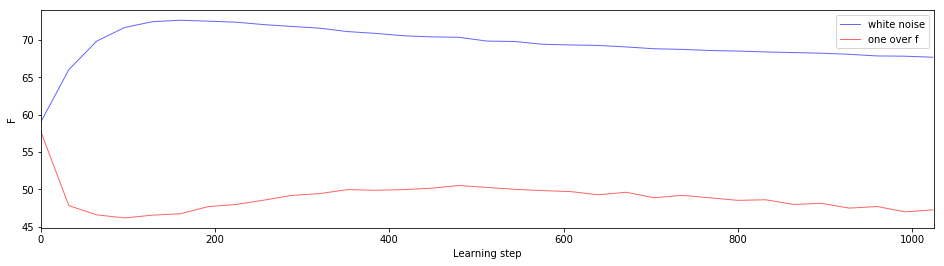

In [54]:
shl = SHL(eta=0.01, beta1=0.)
dico_fixed = shl.learn_dico(data=data, matname=tag + '_fixed', list_figures=[])
shl = SHL()
dico_default = shl.learn_dico(data=data, matname=tag + '_default', list_figures=[])
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico_fixed, variable='F', fig=fig_error, ax=ax_error, color='blue', label='fixed')
fig_error, ax_error = shl.time_plot(dico_default, variable='F', fig=fig_error, ax=ax_error, color='red', label='ADAM')
#ax_error.set_ylim((0, .65))
ax_error.legend(loc='best')

# Computational details



## caching simulation data

A convenience script to run and cache most learning items in this notebooks:

In [55]:
%%writefile nips.py
#!/usr/bin/env python3
# -*- coding: utf-8 -*
from shl_scripts.shl_experiments import SHL

# pre-loading data
datapath = '../../SHL_master/database'
shl = SHL(datapath=datapath)
data = shl.get_data(matname='data')

tag = 'NIPS'
# Figure 1 & 3
N_cv = 10
homeo_methods = ['None', 'OLS', 'HEH', 'HAP', 'EMP']
seed = 42

list_figures = []
for i_cv in range(N_cv):
    for homeo_method in homeo_methods:
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv)
        shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_' + str(i_cv))

# Figure 2-B
from shl_scripts.shl_experiments import SHL_set
variables = ['eta', 'alpha_homeo', 'eta_homeo']

n_jobs = 2 # running in parallel on a multi-core machine
for homeo_method in homeo_methods:
    experiments = SHL_set(dict(homeo_method=homeo_method, datapath=datapath), tag=tag + '_' + homeo_method)
    experiments.run(variables=variables, n_jobs=n_jobs)

Overwriting nips.py


In [ ]:
%run nips.py

DEBUG: eta 0.003 [0.0018541065369616137, 0.0020911314199594053, 0.0023584570402881717, 0.0026599569772581878, 0.003, 0.0033835133714369167, 0.00381605424489747, 0.004303890187913066, 0.00485409]
DEBUG: alpha_homeo 0.08 [0.049442840985643034, 0.055763504532250804, 0.0628921877410179, 0.07093218606021834, 0.08, 0.09022702323831779, 0.1017614465305992, 0.11477040501101508, 0.1294424]
DEBUG: eta_homeo 0.02 [0.012360710246410759, 0.013940876133062701, 0.015723046935254475, 0.017733046515054585, 0.02, 0.022556755809579446, 0.0254403616326498, 0.02869260125275377, 0.0323606]
Running variable eta with value 0.0018541065369616137


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    2.0s


Running variable eta with value 0.0020911314199594053


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    2.3s


Running variable eta with value 0.0023584570402881717


[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    2.6s


Running variable eta with value 0.0026599569772581878


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    2.9s


Running variable eta with value 0.003


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    3.2s


Running variable eta with value 0.0033835133714369167


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    3.5s


Running variable eta with value 0.00381605424489747


[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    3.8s


Running variable eta with value 0.004303890187913066


[Parallel(n_jobs=2)]: Done   8 tasks      | elapsed:    4.1s


Running variable eta with value 0.00485409


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    4.5s


Running variable alpha_homeo with value 0.049442840985643034


[Parallel(n_jobs=2)]: Done  10 tasks      | elapsed:    4.8s


Running variable alpha_homeo with value 0.055763504532250804


[Parallel(n_jobs=2)]: Done  11 tasks      | elapsed:    5.1s


Running variable alpha_homeo with value 0.0628921877410179


[Parallel(n_jobs=2)]: Done  12 tasks      | elapsed:    5.4s


Running variable alpha_homeo with value 0.07093218606021834


[Parallel(n_jobs=2)]: Done  13 tasks      | elapsed:    5.7s


Running variable alpha_homeo with value 0.08


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    6.0s


Running variable alpha_homeo with value 0.09022702323831779


[Parallel(n_jobs=2)]: Done  15 tasks      | elapsed:    6.4s


Running variable alpha_homeo with value 0.1017614465305992


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    6.7s


Running variable alpha_homeo with value 0.11477040501101508


[Parallel(n_jobs=2)]: Done  17 tasks      | elapsed:    7.0s


Running variable alpha_homeo with value 0.1294424


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    7.3s


Running variable eta_homeo with value 0.012360710246410759


[Parallel(n_jobs=2)]: Done  19 tasks      | elapsed:    7.6s


Running variable eta_homeo with value 0.013940876133062701


[Parallel(n_jobs=2)]: Done  20 tasks      | elapsed:    7.9s


Running variable eta_homeo with value 0.015723046935254475


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    8.3s


Running variable eta_homeo with value 0.017733046515054585


[Parallel(n_jobs=2)]: Done  22 tasks      | elapsed:    8.6s


Running variable eta_homeo with value 0.02


[Parallel(n_jobs=2)]: Done  23 tasks      | elapsed:    8.9s


Running variable eta_homeo with value 0.022556755809579446


[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    9.2s


Running variable eta_homeo with value 0.0254403616326498
Running variable eta_homeo with value 0.02869260125275377
Running variable eta_homeo with value 0.0323606


[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:   10.2s finished


DEBUG: eta 0.003 [0.0018541065369616137, 0.0020911314199594053, 0.0023584570402881717, 0.0026599569772581878, 0.003, 0.0033835133714369167, 0.00381605424489747, 0.004303890187913066, 0.00485409]
DEBUG: alpha_homeo 0.08 [0.049442840985643034, 0.055763504532250804, 0.0628921877410179, 0.07093218606021834, 0.08, 0.09022702323831779, 0.1017614465305992, 0.11477040501101508, 0.1294424]
DEBUG: eta_homeo 0.02 [0.012360710246410759, 0.013940876133062701, 0.015723046935254475, 0.017733046515054585, 0.02, 0.022556755809579446, 0.0254403616326498, 0.02869260125275377, 0.0323606]
Running variable eta with value 0.0018541065369616137


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.9s


Running variable eta with value 0.0020911314199594053


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    2.2s


Running variable eta with value 0.0023584570402881717


[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    2.5s


Running variable eta with value 0.0026599569772581878


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    2.9s


Running variable eta with value 0.003


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    3.2s


Running variable eta with value 0.0033835133714369167


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    3.5s


Running variable eta with value 0.00381605424489747


[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    3.8s


Running variable eta with value 0.004303890187913066


[Parallel(n_jobs=2)]: Done   8 tasks      | elapsed:    4.1s


Running variable eta with value 0.00485409


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    4.4s


Running variable alpha_homeo with value 0.049442840985643034


[Parallel(n_jobs=2)]: Done  10 tasks      | elapsed:    4.7s


Running variable alpha_homeo with value 0.055763504532250804


[Parallel(n_jobs=2)]: Done  11 tasks      | elapsed:    5.1s


Running variable alpha_homeo with value 0.0628921877410179


[Parallel(n_jobs=2)]: Done  12 tasks      | elapsed:    5.4s


Running variable alpha_homeo with value 0.07093218606021834


[Parallel(n_jobs=2)]: Done  13 tasks      | elapsed:    5.7s


Running variable alpha_homeo with value 0.08


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    6.0s


Running variable alpha_homeo with value 0.09022702323831779


[Parallel(n_jobs=2)]: Done  15 tasks      | elapsed:    6.3s


Running variable alpha_homeo with value 0.1017614465305992


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    6.6s


Running variable alpha_homeo with value 0.11477040501101508


[Parallel(n_jobs=2)]: Done  17 tasks      | elapsed:    6.9s


Running variable alpha_homeo with value 0.1294424


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    7.2s


Running variable eta_homeo with value 0.012360710246410759


[Parallel(n_jobs=2)]: Done  19 tasks      | elapsed:    7.5s


Running variable eta_homeo with value 0.013940876133062701


[Parallel(n_jobs=2)]: Done  20 tasks      | elapsed:    7.9s


Running variable eta_homeo with value 0.015723046935254475


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    8.2s


Running variable eta_homeo with value 0.017733046515054585


[Parallel(n_jobs=2)]: Done  22 tasks      | elapsed:    8.5s


Running variable eta_homeo with value 0.02


[Parallel(n_jobs=2)]: Done  23 tasks      | elapsed:    8.8s


Running variable eta_homeo with value 0.022556755809579446


[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    9.1s


Running variable eta_homeo with value 0.0254403616326498
Running variable eta_homeo with value 0.02869260125275377
Running variable eta_homeo with value 0.0323606


[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:   10.1s finished


DEBUG: eta 0.003 [0.0018541065369616137, 0.0020911314199594053, 0.0023584570402881717, 0.0026599569772581878, 0.003, 0.0033835133714369167, 0.00381605424489747, 0.004303890187913066, 0.00485409]
DEBUG: alpha_homeo 0.08 [0.049442840985643034, 0.055763504532250804, 0.0628921877410179, 0.07093218606021834, 0.08, 0.09022702323831779, 0.1017614465305992, 0.11477040501101508, 0.1294424]
DEBUG: eta_homeo 0.02 [0.012360710246410759, 0.013940876133062701, 0.015723046935254475, 0.017733046515054585, 0.02, 0.022556755809579446, 0.0254403616326498, 0.02869260125275377, 0.0323606]
Running variable eta with value 0.0018541065369616137


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.8s


Running variable eta with value 0.0020911314199594053


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    2.1s


Running variable eta with value 0.0023584570402881717


[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    2.4s


Running variable eta with value 0.0026599569772581878


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    2.8s


Running variable eta with value 0.003


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    3.1s


Running variable eta with value 0.0033835133714369167


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    3.4s


Running variable eta with value 0.00381605424489747


[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    3.7s


Running variable eta with value 0.004303890187913066


[Parallel(n_jobs=2)]: Done   8 tasks      | elapsed:    4.1s


Running variable eta with value 0.00485409


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    4.4s


Running variable alpha_homeo with value 0.049442840985643034


[Parallel(n_jobs=2)]: Done  10 tasks      | elapsed:    4.7s


Running variable alpha_homeo with value 0.055763504532250804


[Parallel(n_jobs=2)]: Done  11 tasks      | elapsed:    5.0s


Running variable alpha_homeo with value 0.0628921877410179


[Parallel(n_jobs=2)]: Done  12 tasks      | elapsed:    5.4s


Running variable alpha_homeo with value 0.07093218606021834


[Parallel(n_jobs=2)]: Done  13 tasks      | elapsed:    5.7s


Running variable alpha_homeo with value 0.08


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    6.0s


Running variable alpha_homeo with value 0.09022702323831779


[Parallel(n_jobs=2)]: Done  15 tasks      | elapsed:    6.3s


Running variable alpha_homeo with value 0.1017614465305992


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    6.6s


Running variable alpha_homeo with value 0.11477040501101508


[Parallel(n_jobs=2)]: Done  17 tasks      | elapsed:    6.9s


Running variable alpha_homeo with value 0.1294424


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    7.2s


Running variable eta_homeo with value 0.012360710246410759


[Parallel(n_jobs=2)]: Done  19 tasks      | elapsed:    7.5s


Running variable eta_homeo with value 0.013940876133062701


[Parallel(n_jobs=2)]: Done  20 tasks      | elapsed:    7.8s


Running variable eta_homeo with value 0.015723046935254475


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    8.1s


Running variable eta_homeo with value 0.017733046515054585


[Parallel(n_jobs=2)]: Done  22 tasks      | elapsed:    8.3s


Running variable eta_homeo with value 0.02


[Parallel(n_jobs=2)]: Done  23 tasks      | elapsed:    8.6s


Running variable eta_homeo with value 0.022556755809579446


[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    8.9s


Running variable eta_homeo with value 0.0254403616326498
Running variable eta_homeo with value 0.02869260125275377
Running variable eta_homeo with value 0.0323606


[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    9.7s finished


DEBUG: eta 0.003 [0.0018541065369616137, 0.0020911314199594053, 0.0023584570402881717, 0.0026599569772581878, 0.003, 0.0033835133714369167, 0.00381605424489747, 0.004303890187913066, 0.00485409]
DEBUG: alpha_homeo 0.08 [0.049442840985643034, 0.055763504532250804, 0.0628921877410179, 0.07093218606021834, 0.08, 0.09022702323831779, 0.1017614465305992, 0.11477040501101508, 0.1294424]
DEBUG: eta_homeo 0.02 [0.012360710246410759, 0.013940876133062701, 0.015723046935254475, 0.017733046515054585, 0.02, 0.022556755809579446, 0.0254403616326498, 0.02869260125275377, 0.0323606]
Running variable eta with value 0.0018541065369616137


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.9s


Running variable eta with value 0.0020911314199594053


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    2.2s


Running variable eta with value 0.0023584570402881717


[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    2.5s


Running variable eta with value 0.0026599569772581878


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    2.8s


Running variable eta with value 0.003


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    3.1s


Running variable eta with value 0.0033835133714369167


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    3.4s


Running variable eta with value 0.00381605424489747
Running variable eta with value 0.004303890187913066
Running variable eta with value 0.00485409
Running variable alpha_homeo with value 0.049442840985643034


## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts

##  version control

In [ ]:
!git status

In [ ]:
!git pull

In [ ]:
!git commit -am' thursday : cross-validation + controls + nips.py' 

In [ ]:
!git push

Done. Thanks for your attention!